In [130]:
%config Completer.use_jedi = False

In [131]:
import tensorflow as tf
import scipy.io

import numpy as np
import galois
import networkx as nx

In [132]:
x = tf.constant([[0, 1, 0],
           [1, 2, 1],
           [0, 1, 1]])

In [133]:
tf.where(x != 0, x, -1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[-1,  1, -1],
       [ 1,  2,  1],
       [-1,  1,  1]])>

In [134]:
def swap_form(matrix):
    rows = matrix.shape[0]
    return np.concatenate((matrix[:, rows:], matrix[:, :rows]), axis=1)

In [135]:
const_dict = scipy.io.loadmat('constants.mat')
H_test = np.array(const_dict['BCH_test'])
H_32_44 = np.array(const_dict['H_32_44'])
H_4_7 = np.array(const_dict['H_4_7'])

In [139]:
H_4_7.shape

(3, 7)

In [140]:
swap_form(H_4_7)

array([[1, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 1, 0, 0, 1]], dtype=uint8)

In [141]:
galois.parity_check_to_generator_matrix(galois.GF2(swap_form(H_4_7)))

GF([[1, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 1],
    [0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 0, 1]], order=2)

In [154]:
def get_tanner_graph(h_mat):
    def interp(x, n0, n1, m0, m1):
        return (x-n0) / (n1-n0) * (m1 - m0) + m0
    n_c, n_v = h_mat.shape
    print(h_mat.shape)
    t_graph = nx.Graph()
    
    t_graph.add_edges_from(( ('c'+str(c), 'v'+str(v)) for c, v in np.transpose(np.where(h_mat == 1)) ))
    # Positions for drawing
    pos_c = {'c'+str(i): (interp(i, 0, n_c-1, 0, 2), 1)for i in range(n_c)}
    pos_v = {'v'+str(i): (interp(i, 0, n_v-1, 0, 2), 0)for i in range(n_v)}
    return t_graph, {**pos_c, **pos_v}
    

(5, 10)


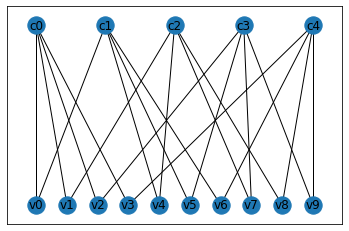

In [155]:
G, pos = get_tanner_graph(H_test)

nx.draw_networkx(G, pos)

In [148]:
H_test

array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 1]], dtype=uint8)